In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

In [2]:
emb_array = np.load('./emb_array.npy')

In [3]:
emb_array = pd.DataFrame(data=emb_array)

In [4]:
emb_data = np.load('./emb_data.npy')

In [25]:
emb_data = pd.DataFrame(data=emb_data)
emb_data.shape

(409, 129)

In [6]:
X = emb_data.drop([128], axis=1)

In [11]:
Y = emb_data[128]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [14]:
classifiers = [KNeighborsClassifier(), RandomForestClassifier(), SVC()]

In [15]:
for i in classifiers:
    i.fit(X_train, y_train)
    score = i.score(X_test, y_test)
    print(i, score, '\n****')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 0.817073170732 
****
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 0.536585365854 
****
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.0487804878049 
****


In [16]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.81707317073170727

In [17]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                     'weights': ['uniform', 'distance'],
                     'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [18]:
CV = GridSearchCV(estimator=clf, param_grid=tuned_parameters, cv= 5)

In [19]:
CV.fit(X_train, y_train)
print(CV.best_params_)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [20]:
CV.score(X_test, y_test)

0.90243902439024393

In [23]:
clf_tuned = KNeighborsClassifier(algorithm='auto', n_neighbors=1, weights='uniform')
clf_tuned.fit(X_train, y_train)
clf_tuned.score(X_test, y_test)

0.90243902439024393

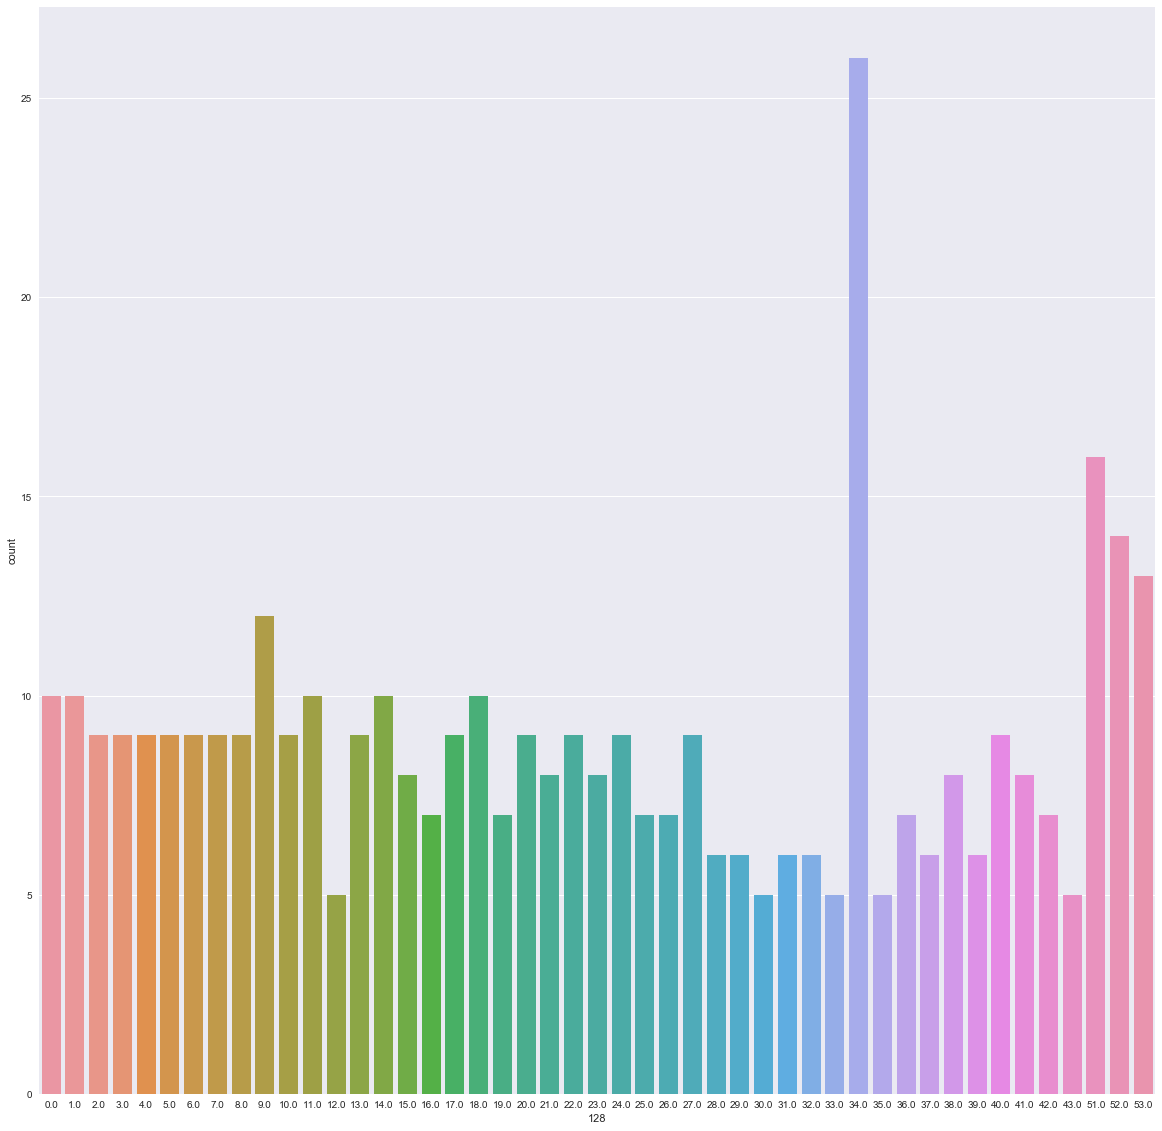

In [24]:
import seaborn as sns
plt.figure(figsize=(20,20))
ax = sns.countplot(x=128, data=emb_data)